<a href="https://colab.research.google.com/github/merriekay/CS167Code/blob/main/Day19_Notes_ANNs_f21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 19 Code: Artificial Neural Networks

We're going to start off by using sklearn MLP to implement a multilayer perceptron, and then we're going to use a deep learning framework, Tensorflow with Keras to build a neural network. 

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/irisData.csv')
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
import pandas
import numpy
from sklearn.model_selection import train_test_split

#Split the dataset
predictors = data.columns.drop('species')
target = "species"
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_data[0:5]

array([[-0.18688501, -1.09883199, -0.14183598, -0.25284018],
       [ 0.77252466, -0.6472572 ,  0.47403077,  0.39546797],
       [-1.14629467, -1.32461939,  0.41804288,  0.65479123],
       [-0.42673742, -1.09883199,  0.362055  ,  0.00648308],
       [ 1.01237707, -0.19568241,  0.80995808,  1.43276101]])

## Build out a Multilayer Perceptron using Scikit-Learn:
Here are the links to the documentation: 
- [sklearn.neural_network.MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)
- [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

I'm providing some code below to create a pretty confusion matrix. 

In [6]:
import seaborn as sns

pretty = True
#This function will print a confusion matrix
# It takes the test_slns, the preds, and a boolean variable pretty, which when True will print a prettier confusion matrix and if it's false it will print a standard conf matrix.
def print_confusion_matrix(test_sln, preds, pretty):
  cf_matrix = confusion_matrix(test_sln, preds,)
  if pretty:
    sns.heatmap(cf_matrix, annot=True,  xticklabels=['p_setosa', 'p_versicolor', 'p_virginica'], yticklabels=['t_setosa', 't_versicolor', 't_virginica']) #p for predicted, t for true
  else:
    print(cf_matrix)

Accuracy:  0.9
                      Pred Iris-setosa  ...  Pred Iris-virginica
True Iris-setosa                     8  ...                    0
True Iris-versicolor                 0  ...                    1
True Iris-virginica                  0  ...                    9

[3 rows x 3 columns]


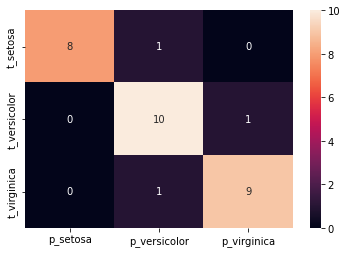

In [7]:
# Set up MLP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data,train_sln)
predictions = mlp.predict(test_data)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))

#call the function from above to get a pretty conf_mat:
print_confusion_matrix(test_sln, predictions, True)

# or:
vals = data[target].unique() ## possible classification values (species)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Pred " + vals))

## In-Class Exercise:

1. Read in the Boston Housing dataset
2. Normalize your data
3. Use a [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to predict the price of a house 'MEDV'
4. Play around with changing the parameters, see what the best R2 score you can get is. 

Be ready to report what your best r2 score is and what parameters you used/changed.

In [ ]:
# Your code goes here for the In-Class Exercise



# Introducing Deep Learning Frameworks

Go ahead and go up to 'Runtime', and select 'change runtime type' from the dropdown list, select 'GPU'. If you complete this step correctly, the following code should say `Found GPU at: /device:GPU:0` or something similar.

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Iris Dataset with Keras

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# we're going to use the iris dataset, but load it from sklearn 
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

#normalize our data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

#X is whre we store our 
print(X_train[0,:])
print(Y_train[0,:])

[ 0.06866179 -0.13197948  0.25122143  0.3957741 ]
[0. 1. 0.]


In [30]:
#build our model
n_features = X.shape[1] #X generally stands for our predictors
n_classes = Y.shape[1] #Y generally stands for our target

model = Sequential(name='iris_1')
model.add(Dense(64, input_dim=n_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "iris_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 195       
Total params: 12,995
Trainable params: 12,995
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import TensorBoard
# TensorBoard Callback
cb = TensorBoard()

history_dict = {}
history_callback = model.fit(X_train, Y_train,
                              batch_size=5,
                              epochs=50,
                              verbose=0,
                              validation_data=(X_test, Y_test),
                              callbacks=[cb])
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

history_dict[model.name] = [history_callback, model]

Test loss: 1.2927358150482178
Test accuracy: 0.8933333158493042


# Boston Housing Dataset with Keras


In [32]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [33]:
# take a look at the data

print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_targets[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


In [34]:
#Let's normalize the data.  (This calculates the z-score for the traning data)
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [35]:
#Build the network
from keras import models
from keras import layers

model = models.Sequential(name='boston_housing1')   #initialize the model

#add some layers. Dense is a fully connected layer
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))

#we only want one value as an ouput, so our last layer has a Dense layer with 1 neuron.
model.add(layers.Dense(1))

#now we 'compile' our model by specifying what kind of optimizer we will use to train. 
#In this case, we are using 'rmsprop' and 
model.compile(optimizer='rmsprop',
          loss='mse',
          metrics=['mae'])
model.summary()

Model: "boston_housing1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [36]:

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print('MSE:', test_mse_score)
print('MAE:', test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 18.6239 - mae: 2.6347
MSE: 18.623865127563477
MAE: 2.634739398956299


# In Class Exercise #2
What parameters from the models above do you think you can/should change? 


Try these
- Change the number of neruons in each layer.  
- Add a layer to the model.
- Change the activation function of the model, [here is the documentation](https://keras.io/api/layers/activations/)
- Change the optimizer, [here is the documentation](https://keras.io/api/optimizers/) with a list of options
- look at the [metrics](https://keras.io/api/metrics/) try adding another metric.
